# ML ASSIGNMENT 2 | 700745499 | SXG54990

In [29]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix


# Question: 1


1. Read the provided CSV file ‘data.csv’

In [64]:

df = pd.read_csv("data.csv")
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


2. Show the basic statistical description about the data.

In [6]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


3. Check if the data has null values.

In [68]:
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [69]:
#Replace the null values with the mean.

df.fillna(df.mean(), inplace=True)
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

4. Select at least two columns and aggregate the data using: min, max, count, mean.

In [18]:
df.agg({'Pulse':['min','max','count','mean'],'Calories':['min','max','count','mean']})

,Pulse,Calories
min,80.000000,50.300000
max,159.000000,1860.400000
count,169.000000,164.000000
mean,107.461538,375.790244


5. Filter the dataframe to select the rows with calories values between 500 and 1000.

In [31]:
df.loc[(df['Calories']>500)&(df['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

In [32]:
df.loc[(df['Calories']>500)&(df['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [34]:
df_modified = df[['Duration','Pulse','Calories']]
df_modified


,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


8. Delete the “Maxpulse” column from the main df dataframe

In [70]:
del df['Maxpulse']
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


9. Convert the datatype of Calories column to int datatype.

In [71]:
df.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [72]:
df['Calories'] = df['Calories'].astype(np.int64)
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

10. Using pandas create a scatter plot for the two columns (Duration and Calories).

<Axes: xlabel='Duration', ylabel='Calories'>

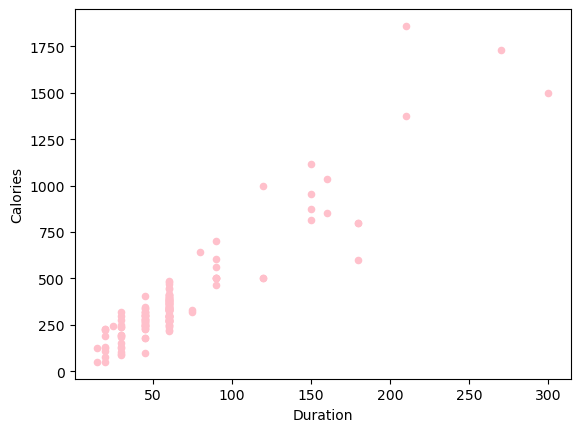

In [38]:
df.plot.scatter(x='Duration',y='Calories',c='PINK')

# Question 2

(Glass)

    1. Implement Naïve Bayes method using scikit-learn library.
        a. Use the glass dataset available in Link also provided in your assignment.
        b. Use train_test_split to create training and testing part.
    2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)
    
    1. Implement linear SVM method using scikit library
        a. Use the glass dataset available in Link also provided in your assignment.
        b. Use train_test_split to create training and testing part.
    2. Evaluate the model on testing part using score and

In [73]:
glass=pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [55]:
mat=glass.corr().style.background_gradient(cmap="Reds")
mat

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


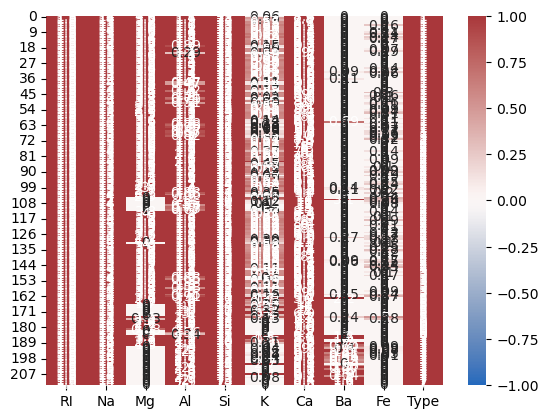

In [60]:
sns.heatmap(glass, annot=True, vmax=1, vmin=-1,center=0, cmap='vlag')
plt.show()

In [61]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass['Type'],test_size=0.2, random_state=1)

classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [63]:
from sklearn.svm import SVC, LinearSVC

classifier = LinearSVC()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.55      1.00      0.71        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.67      0.50      0.57         4

    accuracy                           0.74        43
   macro avg       0.37      0.41      0.38        43
weighted avg       0.66      0.74      0.68        43

[[18  1  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  5  0  0  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  0  2]]
accuracy is 0.7441860465116279


# Which algorithm you got better accuracy? Can you justify why?
The accuracy for SVM is 0.7441860465116279, whereas for Naive Bayes is 0.8372093023255814.
<br>Naive Bayes analysis works well with probabilistic concepts where as Linear SVM works better with linear regression logics. <br>But SVM requires large amounts of data to train and test the data to perform more effieciently and accurately. 
<br> Hence due to the amount of data here we can say that Naive Bayes algorithm gives better accuracy compared to Linear SVM in our case.